In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft
from scipy.fftpack import ifftshift,  fftshift
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
plt.rcParams['image.cmap'] = 'plasma' 

In [2]:
N=1048   #rezolucija
L=5.    # širina zaslona 
lamb=632*10**(-6)
w=0.05  #.širina otvora (mm)
z=100.    #udaljenost otvor - zaslon (mm)
k=2*np.pi/lamb   

delta_src=L/N     #frekvencija uzorkovanja

xv=np.linspace(-N/2,N/2-1,N)
yv=np.linspace(-N/2,N/2-1,N)
[x1,y1]=np.meshgrid(xv,yv)
x1=x1*delta_src  #(mm)
y1=y1*delta_src  # (mm) 
 
#definisati kvadratni otvor
X=np.where(np.abs(x1)<w/2,1,0)
Y=np.where(np.abs(y1)<w/2,1,0)
#dimenzije za 1d slit: w/2, 

u1=X*Y

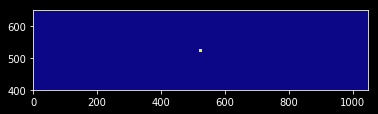

In [3]:
plt.imshow(u1)
plt.ylim(400,650)
plt.show()

In [4]:
#u1=u1.transpose()
g=u1
G=fftshift(np.fft.fft2(g))

In [5]:
h=np.exp(1j*k*z)/1j*lamb*z*np.exp(1j*np.pi/(lamb*z)*(x1**2+y1**2))


In [6]:
u2=h*G

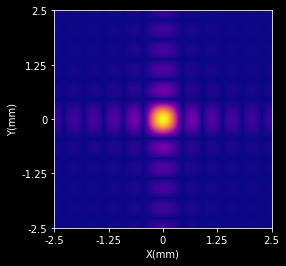

In [7]:
fig=plt.figure()
plt.imshow(np.abs(u2))
plt.xlim(480,568)
plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')
plt.show()



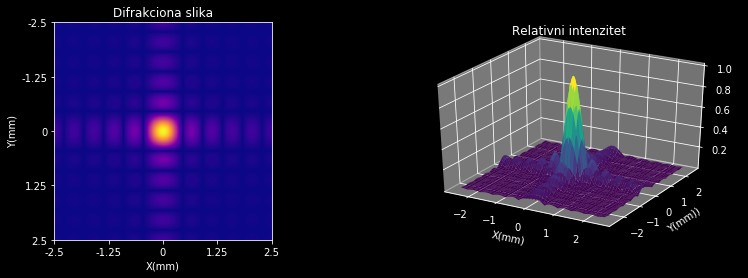

In [8]:
# intenzitet 
Isquare=1./(lamb*z)**2*u2

Isquare=Isquare/Isquare.max()

fig1 = plt.figure(figsize=plt.figaspect(.3))

ax1=fig1.add_subplot(1,2,1)
plt.imshow(np.abs(u2))
#plt.xlim(480,568)
#plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')


ax2=fig1.add_subplot(1,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Isquare),cmap='viridis', edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
plt.show()


In [18]:
#Definisati radijus kruznog otvora
Radi=(x1**2+y1**2)**0.5
XX=np.where(np.abs(Radi) <= w/2,1,0)
YY=np.where(np.abs(Radi) <= w/2,1,0)

In [19]:
u3=XX*YY


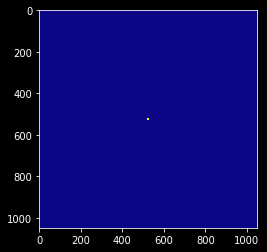

In [20]:
plt.imshow(u3)
plt.show()

In [21]:
gg=u3
GG=fftshift(np.fft.fft2(gg))

hh=np.exp(1j*k*z)/1j*lamb*z*np.exp(1j*np.pi/(lamb*z)*(x1**2+y1**2))
HH=fftshift(np.fft.fft2(hh))

In [22]:
u4=hh*GG

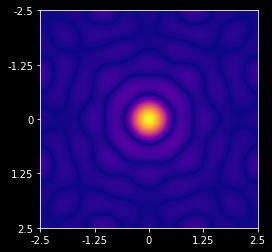

In [23]:
plt.imshow(np.abs(u4))
#plt.xlim(480,568)
#plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
plt.show()

In [24]:
# intenzitet 
Icirc=1./(lamb*z)**2*u4
Icirc=Icirc/Icirc.max()

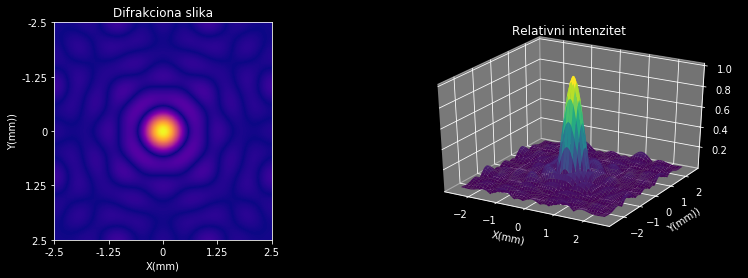

In [25]:
fig1 = plt.figure(figsize=plt.figaspect(.3))

ax1=fig1.add_subplot(1,2,1)
plt.imshow(np.abs(u4))
#plt.xlim(480,568)
#plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax2=fig1.add_subplot(1,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Icirc),cmap='viridis', edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
plt.show()

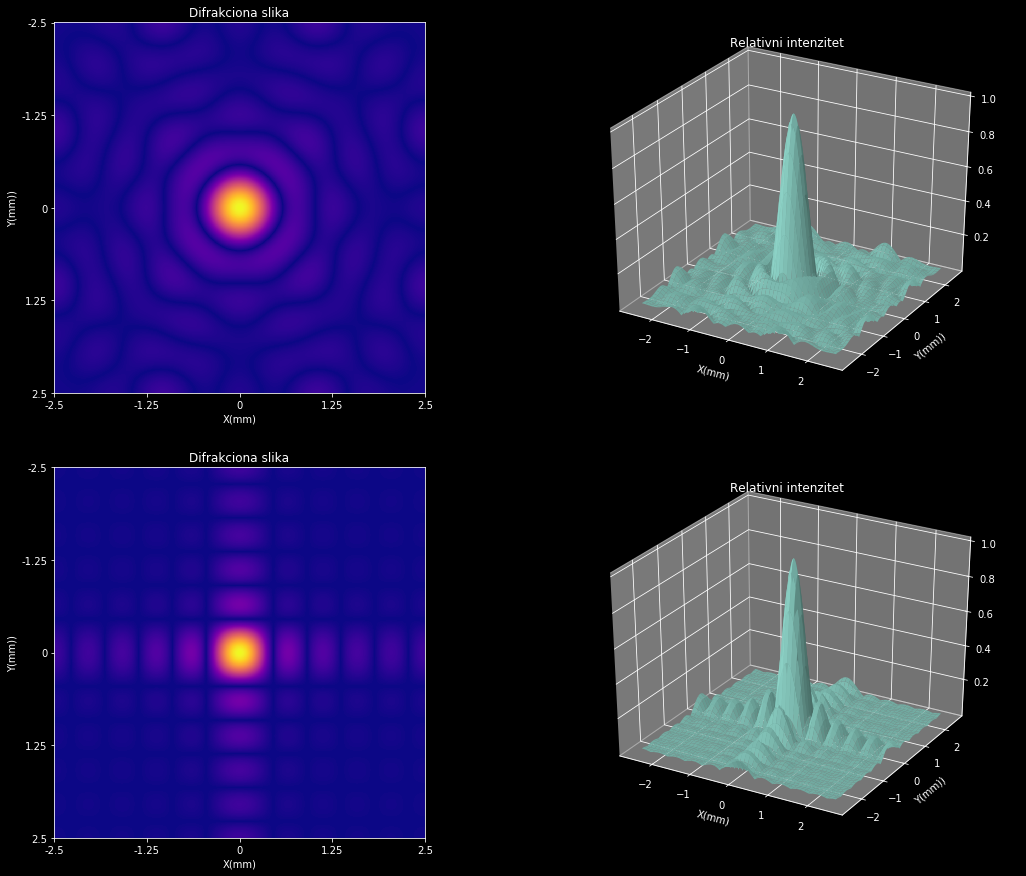

In [27]:
#KOMBINIRANO KVADRAT - KRUG
fig1 = plt.figure(figsize=(18,15))

ax1=fig1.add_subplot(2,2,1)
plt.imshow(np.abs(u4))
#plt.xlim(480,568)
#plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax2=fig1.add_subplot(2,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Icirc), edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')


ax3=fig1.add_subplot(2,2,3)
plt.imshow(np.abs(u2))
#plt.xlim(480,568)
#plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax3.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax4=fig1.add_subplot(2,2,4,projection='3d')
ax4=fig1.gca(projection='3d')
surf=ax4.plot_surface(x1,y1,np.abs(Isquare), edgecolor='none')
ax4.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
fig1.savefig('Fraunhofer_2d.png')
plt.show()